## DECISION TREES
### 21BAI1533 Zeel Mehta

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## TENNIS DATA SET

In [3]:
df=pd.read_csv('tennis.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [5]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [6]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [7]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [8]:
df['windy']=df['windy'].astype(int)

In [9]:
df.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

dfencoded = df
columns_to_encode = ['outlook', 'temp', 'humidity', 'windy']
le = LabelEncoder()
for column in columns_to_encode:
    dfencoded[column] = le.fit_transform(dfencoded[column])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=dfencoded.drop('play',axis=1)
x

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [13]:
y=dfencoded['play']
y


0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

<AxesSubplot:xlabel='play', ylabel='outlook'>

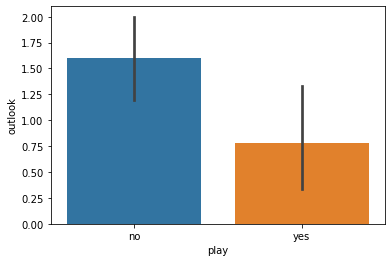

In [14]:
sns.barplot(x='play',y='outlook',data=df)

<AxesSubplot:xlabel='play', ylabel='temp'>

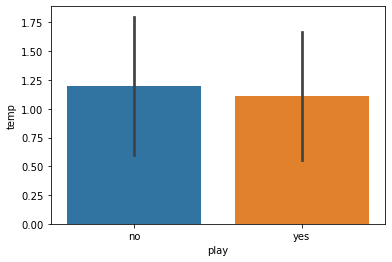

In [15]:
sns.barplot(x='play',y='temp',data=df)

<AxesSubplot:xlabel='play', ylabel='humidity'>

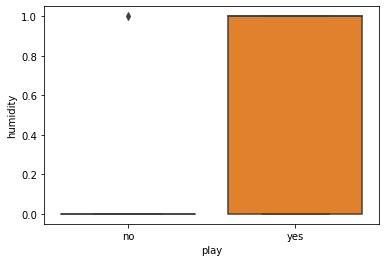

In [16]:
sns.boxplot(x='play',y='humidity',data=df)

<AxesSubplot:xlabel='play', ylabel='windy'>

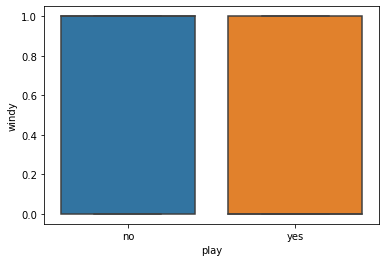

In [17]:
sns.boxplot(x='play',y='windy',data=df)

<AxesSubplot:>

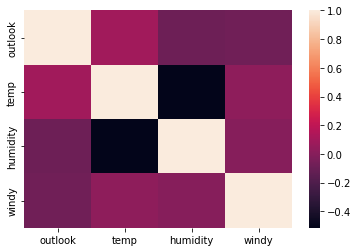

In [18]:
sns.heatmap(df.corr())

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt=DecisionTreeClassifier()

In [22]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
pred=dt.predict(x_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00         1
         yes       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



In [26]:
print(confusion_matrix(y_test,pred))

[[0 1]
 [1 3]]


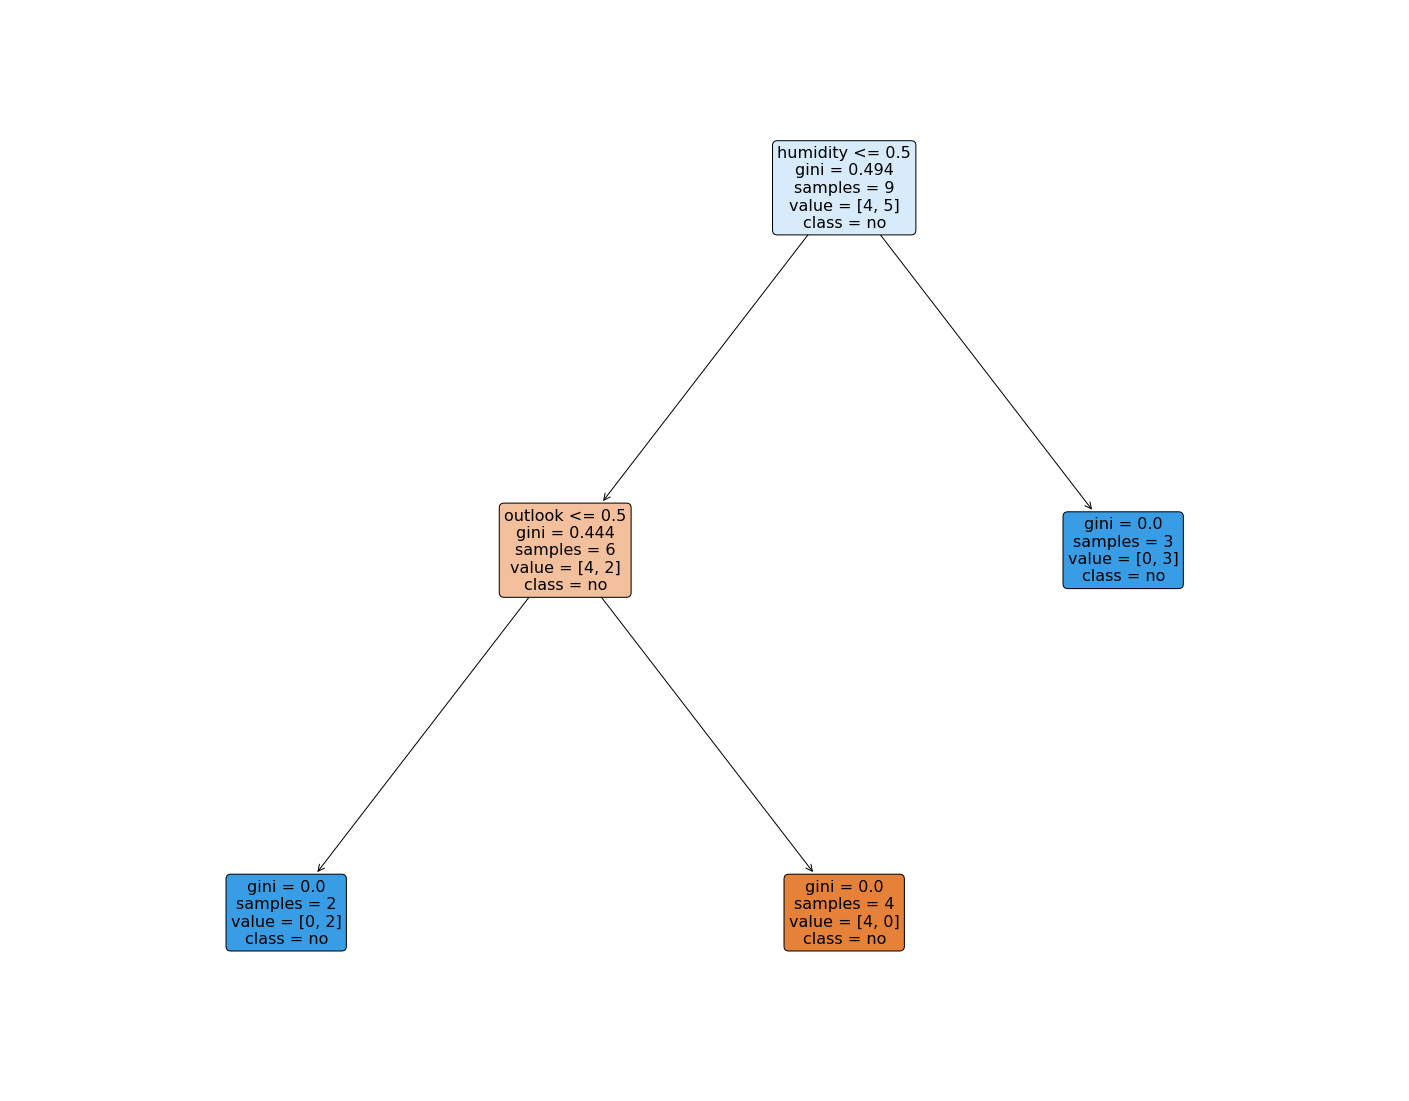

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
a = plot_tree(dt,feature_names=x.columns,class_names=y,filled=True,rounded=True, fontsize=16)

## IRIS DATASET

In [28]:
from sklearn import datasets
iris=pd.read_csv('Iris.csv')

In [29]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

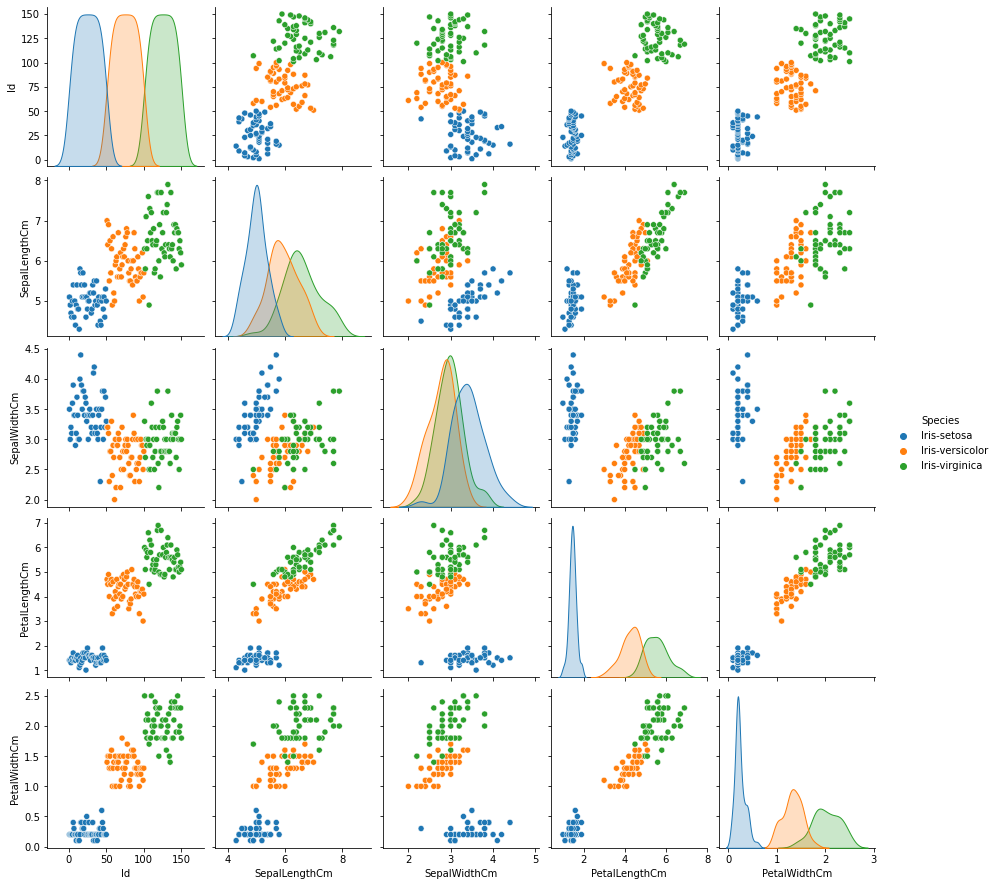

In [33]:
sns.pairplot(iris,hue='Species')

<AxesSubplot:>

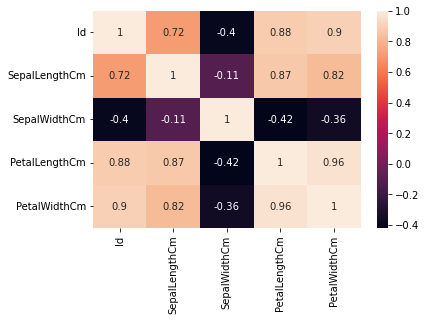

In [34]:
sns.heatmap(iris.corr(),annot=True)

In [35]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [36]:
x=iris.iloc[:,:-1]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [37]:
"""dfencoded = iris
columns_to_encode = ['Species']
le = LabelEncoder()
for column in columns_to_encode:
    dfencoded[column] = le.fit_transform(dfencoded[column])"""

"dfencoded = iris\ncolumns_to_encode = ['Species']\nle = LabelEncoder()\nfor column in columns_to_encode:\n    dfencoded[column] = le.fit_transform(dfencoded[column])"

In [38]:
y=iris['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
pred=dt.predict(x_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [46]:
print(confusion_matrix(y_test,pred))

[[16  0  0]
 [ 0 12  0]
 [ 0  0 17]]


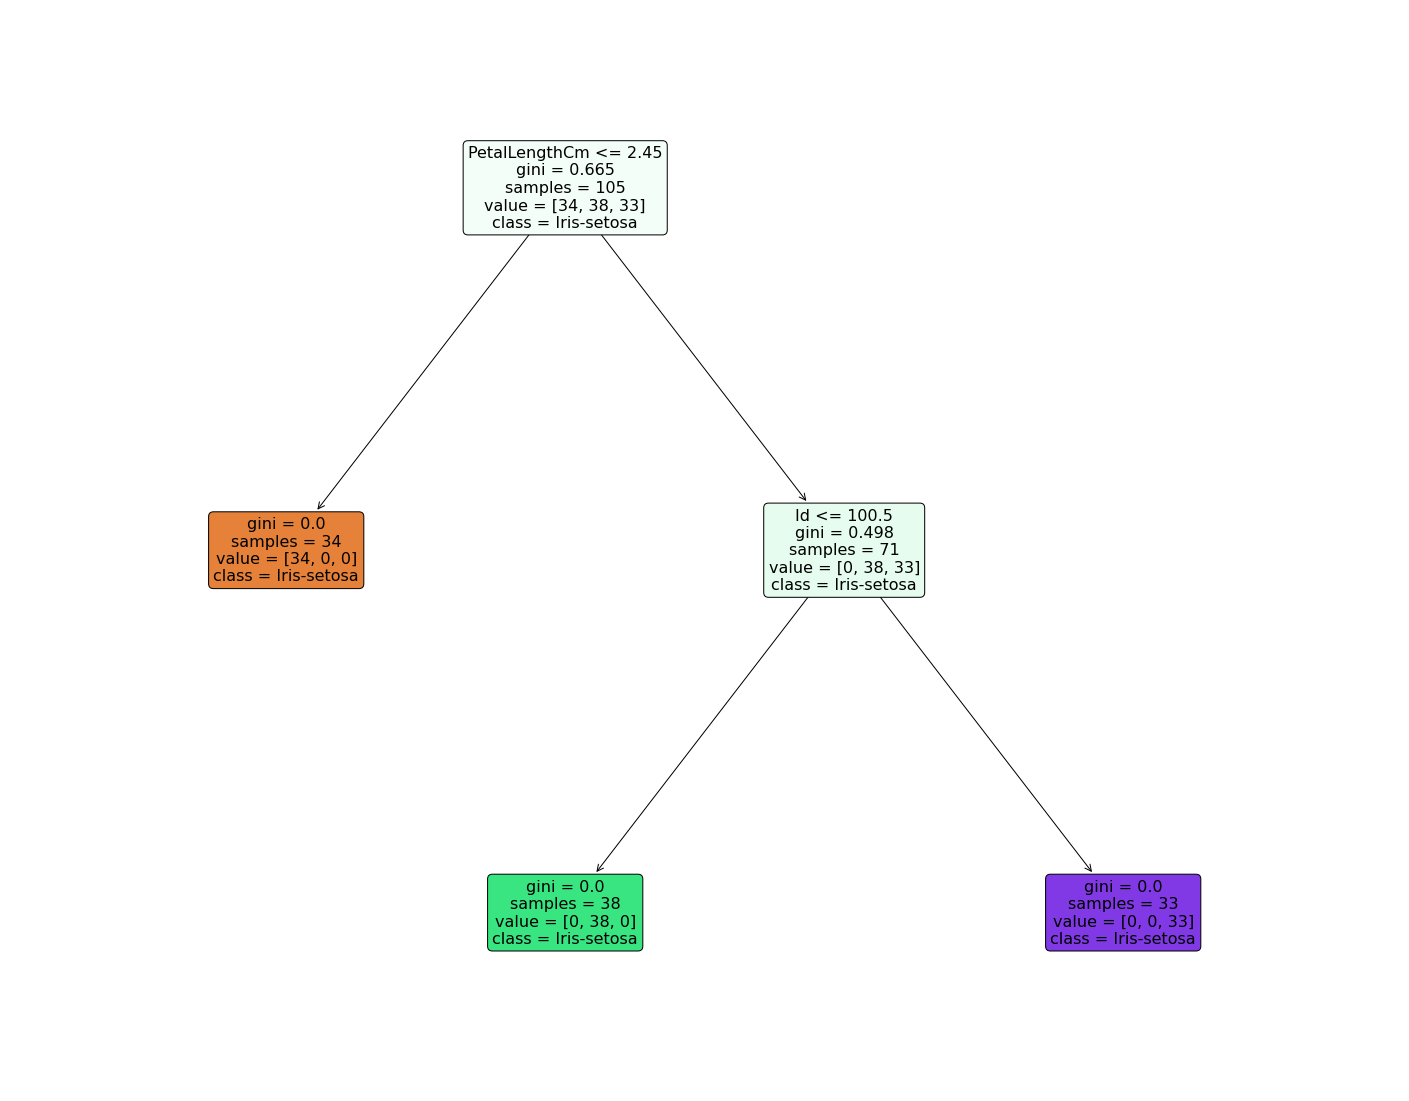

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
a = plot_tree(dt,feature_names=x.columns,class_names=y,filled=True,rounded=True, fontsize=16)

## BOSTON HOUSING DATASET

In [430]:
bstn=pd.read_csv('HousingData.csv')
p=bstn['MEDV']
ft=bstn.drop('MEDV',axis=1)

In [431]:
ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [432]:
p.info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [433]:
ft.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [434]:
ft.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


In [435]:
ft.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
dtype: int64

In [436]:
ft.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [437]:
ft[['CRIM','ZN','INDUS','AGE','LSTAT','CHAS']] = ft[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']].fillna((ft[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']].mean()))

In [438]:
ft.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [439]:
ft[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','PTRATIO', 'B', 'LSTAT']]=ft[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','PTRATIO', 'B', 'LSTAT']].astype(int)

In [440]:
ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CRIM     506 non-null    int64
 1   ZN       506 non-null    int64
 2   INDUS    506 non-null    int64
 3   CHAS     506 non-null    int64
 4   NOX      506 non-null    int64
 5   RM       506 non-null    int64
 6   AGE      506 non-null    int64
 7   DIS      506 non-null    int64
 8   RAD      506 non-null    int64
 9   TAX      506 non-null    int64
 10  PTRATIO  506 non-null    int64
 11  B        506 non-null    int64
 12  LSTAT    506 non-null    int64
dtypes: int64(13)
memory usage: 51.5 KB


In [441]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [442]:
x=bstn.iloc[:,:-1]
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [443]:
bstn['MEDV']=bstn['MEDV'].astype(int)
y=bstn.iloc[:,-1]
y

0      24
1      21
2      34
3      33
4      36
       ..
501    22
502    20
503    23
504    22
505    11
Name: MEDV, Length: 506, dtype: int64

In [449]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [450]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [451]:
pred=dt.predict(x_test)

In [452]:
from sklearn.metrics import classification_report,confusion_matrix

In [453]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         4
          15       0.33      0.33      0.33         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         7
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         8
          20       0.17      0.09      0.12        11
          21       0.00      0.00      0.00         5
          22       0.00      0.00      0.00         4
          23       0.00    

/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zeelmeht

In [454]:
print(confusion_matrix(y_test,pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
